In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
speed = pd.read_csv(r'D:\Machine Learning Coursera\ML-Coursera\Resource\speed_decision_data.csv')

C:\Python\Python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

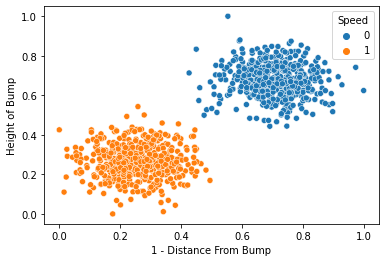

In [20]:
sns.scatterplot(speed["1 - Distance From Bump"],speed["Height of Bump"],hue=speed['Speed'])

In [21]:
x_train = speed[["1 - Distance From Bump","Height of Bump"]]

In [22]:
y_train = speed["Speed"]

In [25]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam') 
model.fit(x_train,y_train,epochs=400,verbose=2)

Epoch 1/400
32/32 - 0s - loss: 0.7058 - 355ms/epoch - 11ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6991 - 101ms/epoch - 3ms/step
Epoch 3/400
32/32 - 0s - loss: 0.6929 - 93ms/epoch - 3ms/step
Epoch 4/400
32/32 - 0s - loss: 0.6870 - 75ms/epoch - 2ms/step
Epoch 5/400
32/32 - 0s - loss: 0.6814 - 78ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 0.6758 - 83ms/epoch - 3ms/step
Epoch 7/400
32/32 - 0s - loss: 0.6705 - 77ms/epoch - 2ms/step
Epoch 8/400
32/32 - 0s - loss: 0.6652 - 82ms/epoch - 3ms/step
Epoch 9/400
32/32 - 0s - loss: 0.6601 - 83ms/epoch - 3ms/step
Epoch 10/400
32/32 - 0s - loss: 0.6552 - 80ms/epoch - 3ms/step
Epoch 11/400
32/32 - 0s - loss: 0.6503 - 83ms/epoch - 3ms/step
Epoch 12/400
32/32 - 0s - loss: 0.6455 - 79ms/epoch - 2ms/step
Epoch 13/400
32/32 - 0s - loss: 0.6409 - 76ms/epoch - 2ms/step
Epoch 14/400
32/32 - 0s - loss: 0.6363 - 79ms/epoch - 2ms/step
Epoch 15/400
32/32 - 0s - loss: 0.6318 - 72ms/epoch - 2ms/step
Epoch 16/400
32/32 - 0s - loss: 0.6272 - 78ms/epoch - 2ms/ste

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [38]:
y_train_predict = model.predict(x_train)

<AxesSubplot:>

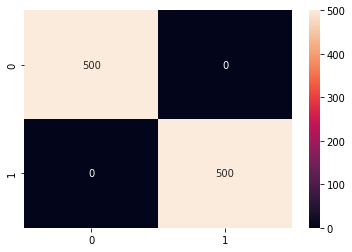

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,y_train_predict.round())

sns.heatmap(cm,annot=True,fmt="d")

In [42]:
weights,biases = model.layers[0].get_weights()

In [43]:
weights

array([[-7.335824 ],
       [-7.8616424]], dtype=float32)

In [44]:
biases

array([7.0359263], dtype=float32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


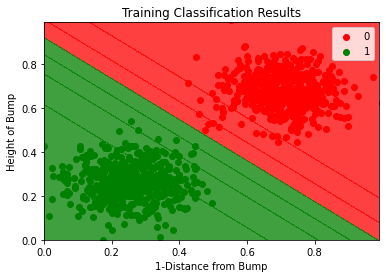

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()